# Aprendizagem supervisionada

Como já vimos, a aprendizagem supervisionada é quando nós *sabemos* o que deve ser *predito*, ou seja, nós temos *exemplos* para guiar o aprendizado. Também sabemos que existem 2 tipos principais de problemas que podemos trabalhar:

- **Classificação**, onde temos um conjunto *discreto* de saídas a serem preditas (i.e., classes);
- **Regressão**, onde temos um conjunto *contínuo* de saídas.

Vamos começar com um exemplo de classificação.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Partiremos de um dataset artificial, gerado pelo *sklearn*. Como é um problema de classificação, utilizaremos a função *make_classifications*, que irá gerar:

- 50 amostras;
- Cada uma com 2 atributos;
- Apenas 1 atributo é informativo (ou seja, apenas um desses atributos seria o suficiente para realizar o aprendizado);
- E mais alguns detalhes para deixar o exemplo mas fácil de ser visualizado.

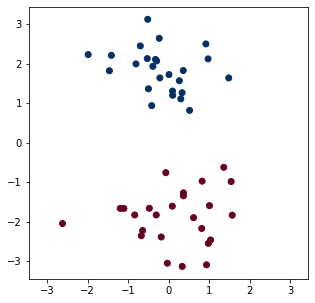

In [ ]:
from sklearn.datasets import make_classification

points, classes = make_classification(n_samples=50, n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, class_sep=2, random_state=42)

def plot_data():
  plt.figure(figsize=(5,5))
  plt.xlim(points.min()*1.1, points.max()*1.1)
  plt.ylim(points.min()*1.1, points.max()*1.1)
  return plt.scatter(points[:,0], points[:,1], c=classes, cmap="RdBu")

plot_data();

Vendo o gráfico acima, podemos notar que todos os pontos azuis estão na parte de cima, enquanto os pontos vermelhos estão na parte de baixo. Se traçássemos uma reta, horizontal, em 0, conseguiríamos dividir os grupos e pronto! Mas ainda não é hora de falar de retas...

Vamos supor que temos um ponto novo, localizado no meio de todo o dado:

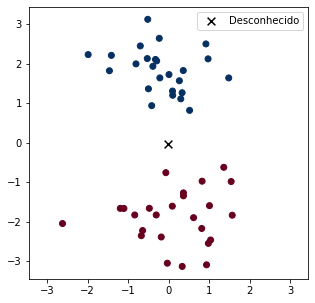

In [ ]:
center = points.mean(axis=0)

def plot_unknown(axes = plt):
  return axes.scatter(center[0], center[1], marker='x', color="k", label="Desconhecido", s=60)

plot_data()
plot_unknown()
plt.legend();

A que grupo ele pertence? Azul ou vermelho? Cima ou baixo? Biscoito ou bolacha?

Qual a maneira mais simples de tomar essa decisão?

## *Diga-me com quem tu andas e direi quem tu és*

\- Com quem tu andas

\- Quem tu és

Talvez, a maneira mais natural, mais instintiva de nossas mentes classificar algo seja por *semelhança*: dois objetos pertencem a um mesmo grupo se forem semelhantes entre si. Do ponto de vista *vetorial*, dois *vetores* são "semelhantes" se eles estão próximos, ou seja, se sua **distância** é pequena.

Vamos experimentar! Inicialmente, calculamos a distância dos pontos já conhecidos ao novo ponto e, em seguida, ordenamos e obtemos o mais próximo:

In [ ]:
distances_df = pd.DataFrame(data=points)
distances_df["classes"] = classes
distances_df["dist"] = np.linalg.norm(points-center, axis=1)
distances_df.sort_values(by='dist', inplace=True)
distances_df.head(1)

,0,1,classes,dist
12,-0.07201,-0.761248,0,0.735103


Pelo resultado acima, podemos dizer, então, que a classe do novo elemento deve ser a classe do ponto mais próximo.

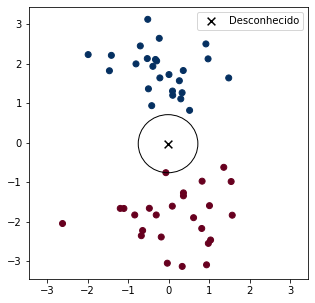

In [ ]:
plot_data()
plot_unknown()

plt.gcf().gca().add_artist(plt.Circle((center[0],center[1]),distances_df.dist.values[0], fill=False))
plt.legend();

Ok, mas analisando o gráfico acima, da pra ver que tem uns pontos azuis bem próximos, correto? Se o raio do círculo acima fosse maior (ou seja, nós olhássemos outros pontos mais próximos), será se o resultado seria diferente?

Vamos experimentar olhando os 3 mais próximos:

In [ ]:
distances_df.head(10)

,0,1,classes,dist
12,-0.072010,-0.761248,0,0.735103
17,0.513267,0.815587,1,0.996916
7,-0.420645,0.934429,1,1.043509
2,0.296120,1.106390,1,1.177149
6,0.097078,1.197252,1,1.230769
29,0.821903,-0.976815,0,1.266857
22,0.361636,-1.272634,0,1.301017
14,0.328751,1.262129,1,1.335989
5,0.091761,1.304346,1,1.336988
33,0.361396,-1.347901,0,1.373123


Opa, agora temos 2 de uma classe e 1 de outra. Dessa forma, então, a classe do novo elemento mudaria, certo?

Vamos visualizar:

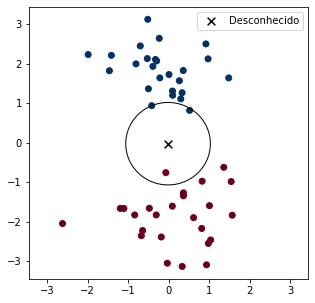

In [ ]:
plot_data()
plot_unknown()

plt.gcf().gca().add_artist(plt.Circle((center[0],center[1]),distances_df.dist.values[2], fill=False))
plt.legend();

Ok, ok... e se nós mudássemos novamente o número de pontos mais próximos, o resultado mudaria? Como bons (aspirantes a) cientistas de dados, devemos **experimentar!**

Modifique as análises acima e veja o que acontece. Aproveite e tente pensar em respostas para as seguintes perguntas:

- Quantos elementos mais próximos devemos escolher?
- E se utilizarmos TODOS os pontos conhecidos?
- Devemos sempre usar distância euclidiana? E a Manhattan? Mahalanobis?

A técnica que acabamos de ver é, talvez, o modelo mais simples de *machine learning* que existe. Ele é chamado de *K-Nearest-Neighbors* (ou kNN, para os mais chegados). Bem intuitivo, não?

### Tá, mas isso só serve pra classificação. E pra regressão?

Quem disse?

Vamos experimentar agora um dataset (sintético) de regressão. Nosso querido *sklearn* tem um método pra nos ajudar novamente!

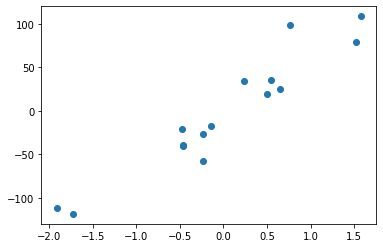

In [ ]:
from sklearn.datasets import make_regression
points, values = make_regression(n_samples=15,n_features=1, noise=20, random_state=42)
plt.scatter(points, values);

Suponha, agora, que desejamos prever, a partir do valor no eixo X, seu valor no eixo Y. Qual seria o valor para o X abaixo?

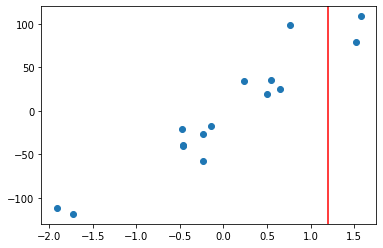

In [ ]:
x = 1.2
plt.scatter(points, values)
plt.axvline(x=x, c='r');

Bom, o kNN baseia-se na noção de proximidade, certo? Então vamos começar identificando os pontos mais próximos!

In [ ]:
df = pd.DataFrame(data=points)
df["value"] = values
df["dist"] = np.abs(points - x)
df.sort_values(by='dist', inplace=True)
df.head(3)

,0,value,dist
7,1.523030,79.120147,0.323030
12,1.579213,108.579003,0.379213
10,0.767435,98.145477,0.432565


Ok, mas e agora? Não podemos simplesmente contar o número de ocorrência de valores, pois, na regressão, *os valores preditos são* ***contínuos***. O que podemos fazer?

Bom, uma maneira seria encontrar uma única representação para esses 3 valores. Devemos, então, utilziar um valor *representativo*, algo como:

- uma **Média**
- uma **Mediana**
- uma **Moda**

Vamos experimentar!

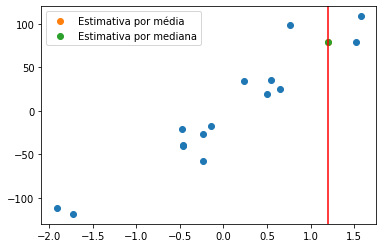

In [ ]:
plt.scatter(points, values)
plt.axvline(x=x, c='r')
k = 1
mean_value = np.mean(df.value.values[:k])
median_value = np.median(df.value.values[:k])

plt.scatter(x, mean_value, label="Estimativa por média")
plt.scatter(x, median_value, label="Estimativa por mediana")
_ = plt.legend()

No exemplo acima, a média e mediana deram valores bem próximos, o que pode ser um bom sinal.

Explore um pouco mais a implementação acima, experimentando outros valores para k e, como sempre, tentando responder algumas perguntas:

- Quantos elementos mais próximos devemos escolher?
- E se utilizarmos TODOS os pontos conhecidos?
- Devemos sempre usar distância euclidiana? E a Manhattan? Mahalanobis?
- Como devemos encontrar esse valor representativo? Média é sempre a melhor opção?

### Knn no Scikit-Learn

Não! Você não precisa implementar esse modelo sempre que for usar. Nosso querido *sklearn* já traz ele implementado! E mais: ele traz tanto a implementação para classificação quanto para regressão!

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

Como todos os modelos do *sklearn*, o kNN segue uma interface padrão:

- Um método *construtor*, onde informamos os *hiperparâmetros* (no caso, o valor de k);
- Um método `fit`, para *treinar* o modelo com os dados;
- Um método `predict`, para realizar a *predição* de **novos pontos** (atente-se ao plural desta frase, pois o método espera, sempre, um conjunto de pontos, ou seja, uma matriz onde as linhas sejam os pontos a serem preditos).

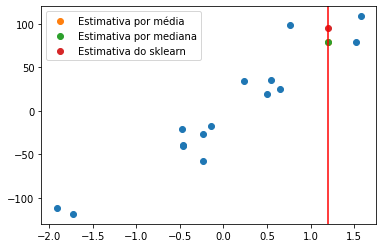

In [ ]:
model = KNeighborsRegressor(n_neighbors=3)
model.fit(points, values)

plt.scatter(points, values)
plt.axvline(x=x, c='r')

plt.scatter(x, mean_value, label="Estimativa por média")
plt.scatter(x, median_value, label="Estimativa por mediana")
plt.scatter([x], model.predict([[x]]), label="Estimativa do sklearn")
plt.legend();

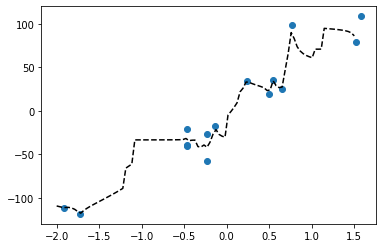

In [ ]:
model = KNeighborsRegressor(n_neighbors=3, weights="distance")
model.fit(points, values)

plt.scatter(points, values)
xx = np.linspace(-2, 1.5, 100)

plt.plot(xx, model.predict(xx.reshape(-1,1)), "k--", label="Estimativa do sklearn");

Antes de continuarmos, uma pergunta: Você vê pontos negativos para o kNN? Algum *gargalo* em seu funcionamento? Se sim, qual(is)?

### Variações do kNN

O kNN, além de intuitivo, é bastante versátil. Nós não só podemos brincar com os valores de k e medidas de distância, como também podemos modificar a própria representação dos dados conhecidos!

Vamos entender melhor isso com exemplos de classificação:

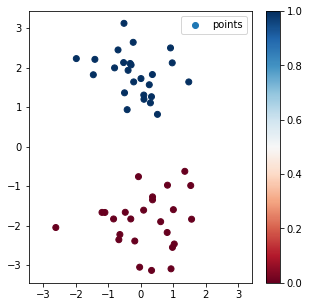

In [ ]:
points, classes = make_classification(n_samples=50, n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, class_sep=2, random_state=42)

def plot_data():
  plt.figure(figsize=(5,5))
  plt.xlim(points.min()*1.1, points.max()*1.1)
  plt.ylim(points.min()*1.1, points.max()*1.1)
  ax = plt.scatter(points[:,0], points[:,1], c=classes, cmap="RdBu", label="points")
  plt.colorbar(ax)
  plt.legend()
  return ax

plot_data();

#### Implementação básica

A implementação abaixo é a mais igênua possível para o kNN: em seu treinamento, nós apenas guardamos todos os pontos e, ao realizar uma predição, encontramos os mais próximos e vemos a classe mais frequente.

In [ ]:
class Knn():
  def __init__(self, k=3):
    self.k = k

  def fit(self, X, Y):
    df = pd.DataFrame(data=X)
    df["value"] = Y
    self.data = df

  def predict_one(self, x):
    df = self.data
    df["dist"] = np.linalg.norm(df.values[:,:-1] - x)
    df.sort_values(by="dist", inplace=True)
    return df.head(self.k).value.value_counts().index[0]

Classe predita para ponto [-0.01771948 -0.02815164]: 1


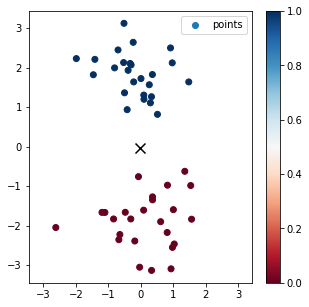

In [ ]:
model = Knn()
model.fit(points, classes)
plot_data()

plt.scatter(center[0], center[1], c='k', marker='x', s=100)
print(f"Classe predita para ponto {center}: {model.predict_one(center)}")

Um problema dessa abordagem é o *custo computacional*:

- o kNN precisa manter TODOS os pontos conhecidos em memória;
- a predição precisa percorrer TODOS os pontos para encontrar os mais próximos;

É estranho falarmos de *aprendizado de máquinas* se nosso modelo não *aprendeu* nenhum tipo de padrão ou comportamento. Nesse caso, que informação poderíamos extrair dos grupos a fim de resolver os problemas acima?

#### *Centróide mais próximo*

Uma alternativa simples é, simplesmente, encontrar o centróide dos elementos de uma classe, ou seja, o ponto *médio* de seus elementos. Dessa forma, guardaremos apenas um ponto pra cada classe e bastaria, na predição, calcular a distância para esses pontos e encontrar o centróide mais próximo!

In [ ]:
class NearestCentroid():
  def __init__(self):
    pass

  def fit(self, X, Y):
    centroids = []
    classes = np.unique(Y) 
    for y in classes:
      class_points = X[Y == y]
      centroids.append(class_points.mean(axis=0))

    df = pd.DataFrame(data=np.array(centroids))
    df["value"] = classes
    self.data = df

  def predict_one(self, x):
    df = self.data
    df["dist"] = np.linalg.norm(df.values[:,:-1] - x)
    df.sort_values(by="dist", inplace=True)
    return df.value.index[0]

  def plot_centroids(self):
    df = self.data
    centroids = df.values[:,:-1]
    plt.scatter(centroids[:,0], centroids[:,1], label="Centróides", c='w', marker="^", s=110, edgecolors='k')
    plt.legend()

Classe predita para ponto [-0.01771948 -0.02815164]: 0


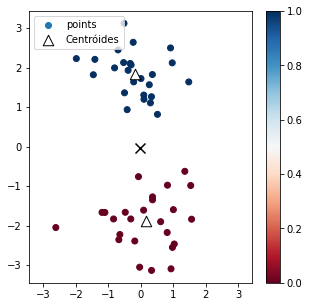

In [ ]:
model = NearestCentroid()
model.fit(points, classes)

plot_data()
model.plot_centroids()
plt.scatter(center[0], center[1], c='k', marker='x', s=100)
print(f"Classe predita para ponto {center}: {model.predict_one(center)}")

Será se essa solução é infalível?

- Quando que ela é uma boa opção?
- Quando que ela não é?

#### *Distribuição mais próxima*

A estatística é uma poderosa aliada do cientista de dados! Jamais esqueça!

Como vimos na aula de Matplotlib, podemos representar uma distribuição de probabilidade Normal utilizando uma média e uma matriz de covariância, gerando, assim sua *função densidade de probabilidade* (pdf). Essa função nos diz a probabilidade de um valor ocorrer nessa distribuição.

Vamos supor, por um momento, que os dados de uma mesma classe seguem uma distribuição Normal. Logo, utilizando a média do grupo e sua matriz de covariância, temos uma pdf para cada classe. Logo, dado um novo ponto, podemos calcular a sua probabilidade em cada uma das distribuições. A distribuição que apontar a maior probabilidade, então, representará a classe a que ele pertence. Interessante, não?

Portanto, podemos fazer a seguinte adaptação no modelo:

- Na etapa de treinamento, para cada classe, encontramos a média e a matriz de covariância de seus pontos;
- Na etapa de predição, calculamos a probabilidade de cada ponto em cada classe e atribuímos a classe de maior probabilidade.

In [ ]:
from scipy.stats import multivariate_normal as normal
class NearestDistribution():
  def __init__(self):
    pass

  def fit(self, X, Y):
    self.bounds = [X.min()*1.1, X.max()*1.1]
    pdfs = []
    classes = np.unique(Y) 
    for y in classes:
      class_points = X[Y == y]
      mean = class_points.mean(axis=0)
      cov = np.cov(class_points.T)
      pdfs.append(normal(mean=mean, cov=cov).pdf)
    
    self.classes = classes
    self.pdfs = pdfs

  def predict_proba(self,X):
    probs = np.zeros((X.shape[0], len(self.classes)))

    for c_i, pdf in enumerate(self.pdfs):
      probs[:,c_i] = pdf(X)
    return probs

  def predict(self, x):
    probs = self.predict_proba(x.reshape(-1,2))
    classes_index = probs.argmax(axis=1)
    return self.classes[classes_index]

  def plot_pdfs(self, resolution=100):
    x = y = np.linspace(self.bounds[0], self.bounds[1], resolution)
    grid = np.dstack(np.meshgrid(x,y)).reshape(-1,2)
    densities = self.predict_proba(grid).max(axis=1).reshape(resolution, resolution)
    plt.imshow(densities, extent=(x[0], x[-1], y[0], y[-1]))

Classe predita para ponto [-0.01771948 -0.02815164]: [0]


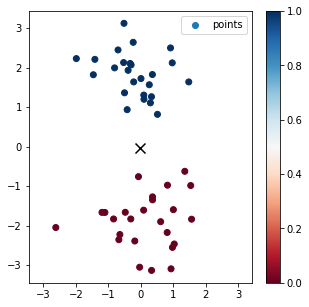

In [ ]:
model = NearestDistribution()
model.fit(points, classes)
plot_data()
plt.scatter(center[0], center[1], c='k', marker='x', s=100)
print(f"Classe predita para ponto {center}: {model.predict(center)}")

Para entender melhor o que está acontecendo, vamos visualizar as distribuições de probabilidade encontradas pelo modelo:

Classe predita para ponto [1 2]: [1]


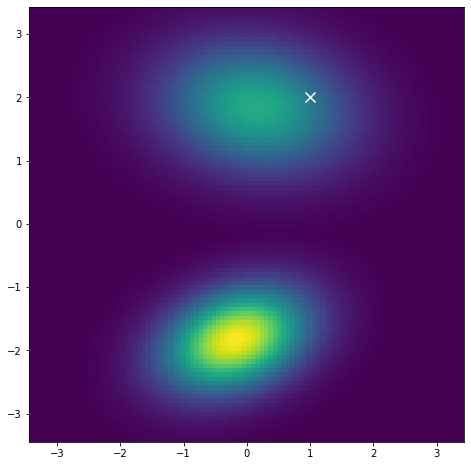

In [ ]:
center = np.array([1,2])
plt.figure(figsize=(8,8))
model.plot_pdfs()
_ = plt.scatter(center[0], center[1], c='w', marker='x', s=100)
print(f"Classe predita para ponto {center}: {model.predict(center)}")

### Dados sobrepostos

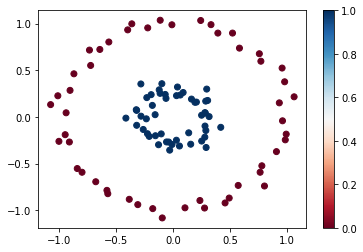

In [ ]:
from sklearn.datasets import make_circles
X, Y = make_circles(n_samples=100,random_state=42, factor=.3, noise=.05)

c = plt.scatter(X[:,0], X[:,1], c=Y, cmap="RdBu");
plt.colorbar(c);

(array([0.18941542, 0.01319728]), array([0.31125227, 3.30937181]))

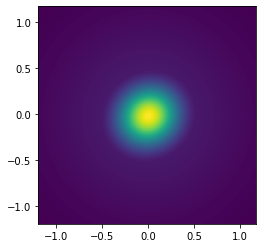

In [ ]:
model = NearestDistribution()
model.fit(X, Y)

model.plot_pdfs()
model.predict_proba(np.array([0.5,0.5]))[0], model.predict_proba(np.array([0,0]))[0]